Federico Brescia

# Data science: CHIP Dataset Analysis

This notebook will analyze a dataset of **2185 CPUs** and **2688 GPUs** from https://chip-dataset.vercel.app/. The goal is to determine statistics and graphs that explain the trends of the dataset.

## Import libraries

To perform the analysis, it is necessary to import the libraries that will be used later in the code:

In [1]:
import numpy as np # perform efficient operation with numpy array 
import pandas as pd # perform operation on dataframe
import matplotlib as matlib # perform data plots
import matplotlib.pyplot as plt # perform data plots
import seaborn as sns # perform statistical data visualization
import scipy.stats as stats

## Read data
We first read the .csv file, then show the first elements in the dataset to see how it is built. Pandas "read_csv" and "head" functions are used.

In [2]:
chips = pd.read_csv('data/chip_dataset.csv', delimiter = ',', index_col=0)
chips.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


A discrepancy was noticed in the generic names used: when the product series is indicated instead of the product itself, it is not possible to distinguish between products in the series.

Another problem noticed is the lack of information to distinguish the version of the product (for example, if there have been updates to the physical device due to consumer needs) or the final destination of the product, such as a desktop or laptop PC. This distinction is important because there are many products with the same name but different construction and performance/consumption depending on the type intended.

Through the duplicated function we can identify the values to take into account later

In [3]:
chips[(chips.duplicated(subset=['Product']) == True)]

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
24,AMD Athlon 64 3500+,CPU,2001-01-01,90.0,67.0,115.0,105.0,2200.0,Unknown,AMD,NaN,NaN,NaN
77,AMD Athlon 64 3500+,CPU,2005-05-31,90.0,67.0,156.0,154.0,2200.0,Unknown,AMD,NaN,NaN,NaN
110,AMD Athlon 64 3500+,CPU,2007-02-20,90.0,62.0,230.0,227.0,2200.0,Unknown,AMD,NaN,NaN,NaN
122,AMD Athlon 64 3000+,CPU,2005-04-14,130.0,62.0,NaN,105.0,1800.0,Unknown,AMD,NaN,NaN,NaN
146,Intel Pentium 4 506,CPU,2005-06-01,90.0,84.0,109.0,125.0,2660.0,Intel,Intel,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4834,ATI Mobility Radeon 9200,GPU,2003-03-01,150.0,NaN,81.0,36.0,200.0,UMC,ATI,NaN,NaN,NaN
4838,NVIDIA GeForce 6800 GS,GPU,2005-12-08,130.0,NaN,287.0,222.0,350.0,TSMC,NVIDIA,NaN,NaN,NaN
4850,Intel GMA 950,GPU,2005-06-01,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN,NaN,NaN
4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN


Analyzing the parameters of the dataset, many null values were detected, especially for the FP16, FP32 and FP64 indices, which therefore will not be very useful.

Through the isnull function and the sum function, null values in the dataset are counted.

In [4]:
chips.isnull().sum()

Product                     0
Type                        0
Release Date                0
Process Size (nm)           9
TDP (W)                   626
Die Size (mm^2)           715
Transistors (million)     711
Freq (MHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              4318
FP32 GFLOPS              2906
FP64 GFLOPS              3548
dtype: int64

By plotting a heatmap, it is possible to see if it is appropriate to remove columns in the dataset because they contain few values that do not generate enough information.

<AxesSubplot:>

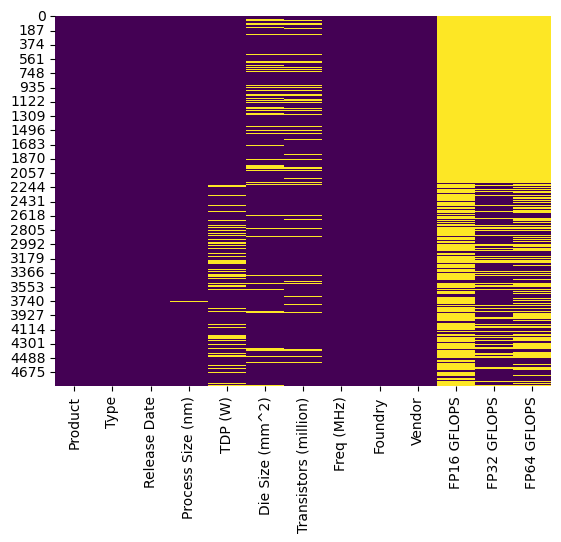

In [5]:
sns.heatmap(chips.isnull(), cbar = False, cmap = 'viridis')

In this dataset, the columns FP16 and FP64 do not contain enough information and have therefore been discarded.

In [6]:
chips.drop(['FP16 GFLOPS', 'FP64 GFLOPS'], axis = 1)

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP32 GFLOPS
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,432.0
4850,Intel GMA 950,GPU,2005-06-01,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN
4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,52.8
4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA,NaN


To facilitate the analysis, the values of date strings have been converted to datetime dates.

In [7]:
chips['Release Date'] = pd.to_datetime(chips['Release Date'], format='%Y-%m-%d')
gpus = chips[chips['Type']=='GPU']
cpus = chips[chips['Type']=='CPU']

## Data analysis

Data analysis began by verifying if the most famous chip trends still hold, such as Moore’s Law, and then discovering other trends from the dataset.

### Moore Law

Moore’s Law is an observation that the number of transistors in an integrated circuit doubles approximately every two years. It is not a law of nature but rather an empirical relationship linked to gains from experience in production. The law was first described by Gordon E. Moore, the co-founder of Intel, in 1965. The law has been used as a prediction that the performance and capabilities of computers will continue to increase while the price of computers decreases. However, there are debates on whether this trend will continue as it has been slowing down in recent years.

In 1965, Moore hypothesized that the transistor density in integrated circuits would have an exponential growth, doubling approximately every 12 months. This trend was confirmed in 1975 and, before the end of the decade, the doubling period extended to two years, a value that remained constant for all the eighties. The law, which was applied also to the nineties and that is still valid today, was modified at the end of the eighties in its final version, according to which the transistor density in integrated circuits doubles every 18 months. This law has become the parameter and the goal for all the companies in the sector, such as Intel and AMD.

To verify if Moore’s Law still holds, the number of transistors in millions of each individual chip and the size of the production process (viewed as a scale of colors) and therefore the transistors inside it with its production date are plotted. For ease of visualization, CPUs have been separated from GPUs.

To assess the validity of Moore’s law, we performed a high-degree polynomial regression analysis on the data and displayed the results. The graphs show that the relationship is mostly linear.

e:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


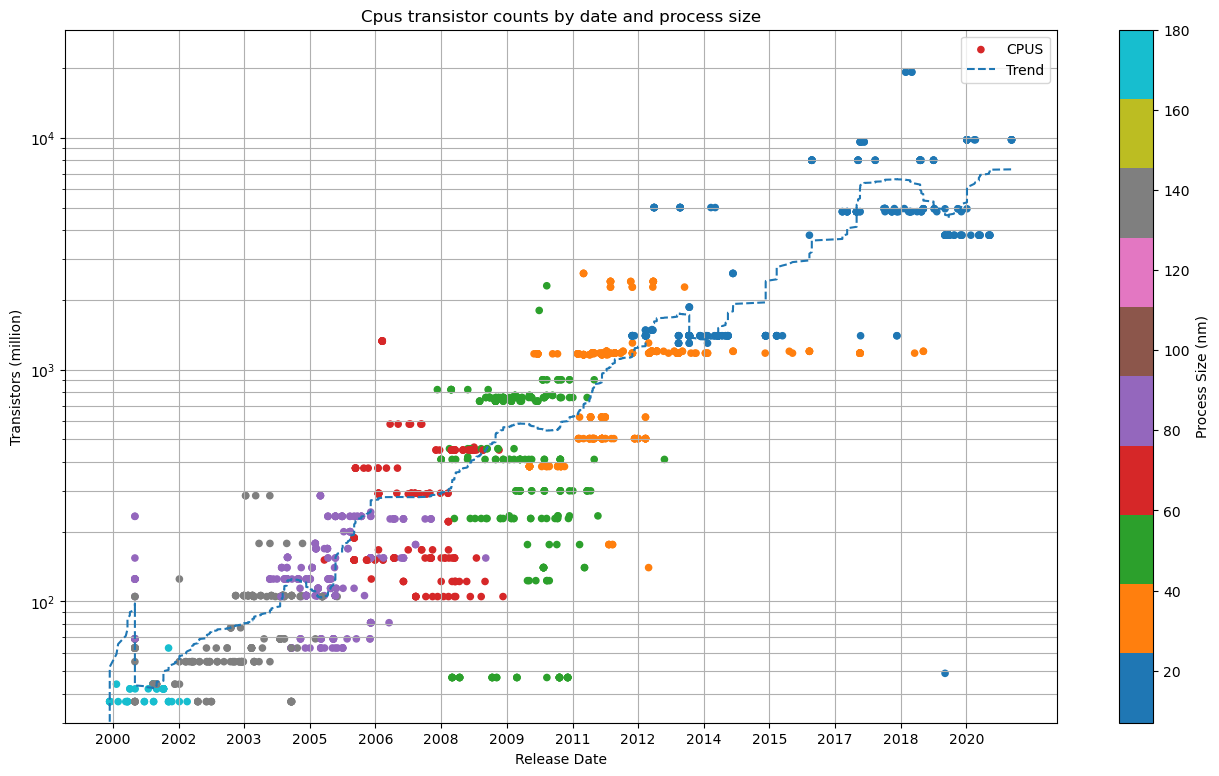

In [8]:
fig, ax = plt.subplots(figsize=(16,9))
cpus.plot.scatter('Release Date', y='Transistors (million)', ax=ax, logy=True, c=cpus['Process Size (nm)'], cmap='tab10', label='CPUS')
fig.get_axes()[1].set_ylabel('Process Size (nm)')
ax.xaxis.set_major_locator(matlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matlib.dates.DateFormatter("%Y"))
plt.xticks(pd.date_range(cpus['Release Date'].min(), cpus['Release Date'].max(), freq='18MS'))
plt.title('Cpus transistor counts by date and process size')

df = cpus
df = df.dropna(subset=['Transistors (million)'])
df = df.sort_values(by='Release Date')
ax.grid(True, which="both")
trans = df['Transistors (million)']

# dates are linear so just use len of usage array and save dates as tick labels
ax.plot(df['Release Date'], np.poly1d(np.polyfit(range(len(trans)), trans, 29))(range(len(trans))), '--', label='Trend')
ax.grid(True, which="both")
ax.set_ylim(bottom=30)
plt.legend()

e:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


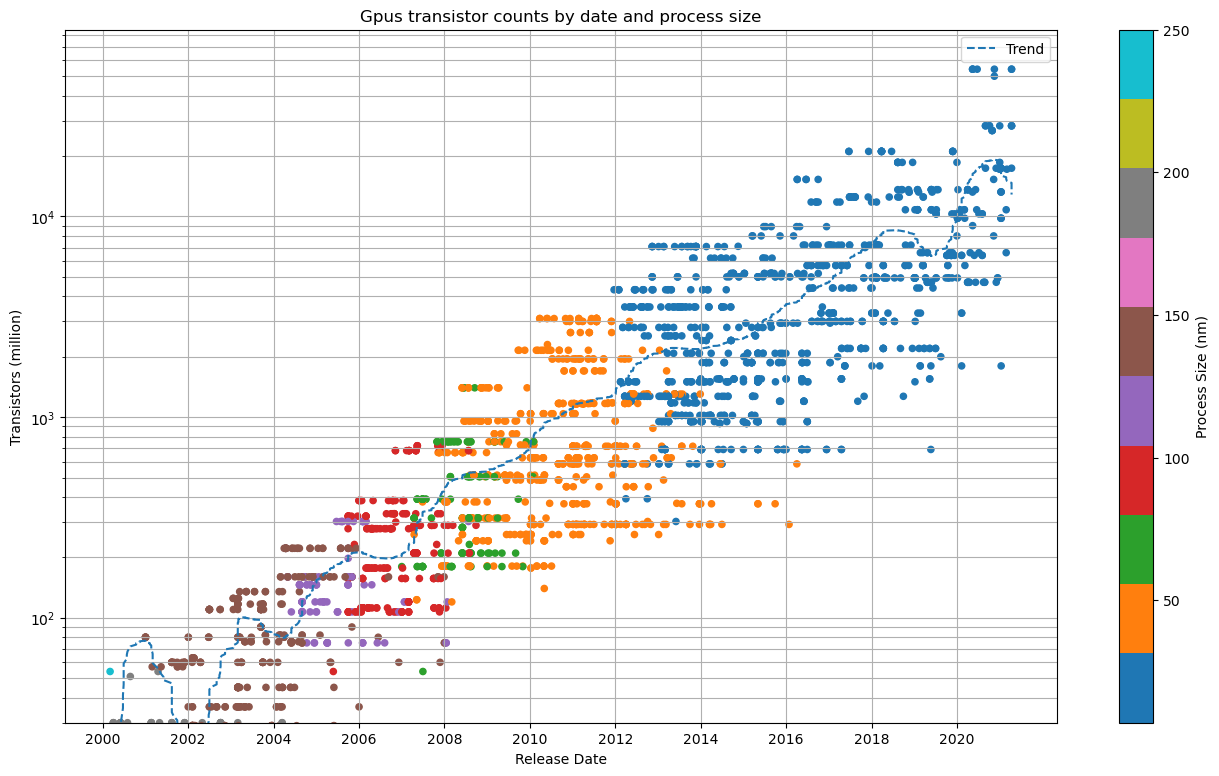

In [9]:
fig, ax = plt.subplots(figsize=(16,9))
gpus.plot.scatter('Release Date', y='Transistors (million)', ax=ax, logy=True, c=gpus['Process Size (nm)'], cmap='tab10')
fig.get_axes()[1].set_ylabel('Process Size (nm)')
ax.xaxis.set_major_locator(matlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matlib.dates.DateFormatter("%Y"))
plt.xticks(pd.date_range(gpus['Release Date'].min(), gpus['Release Date'].max(), freq='2YS'))
plt.title('Gpus transistor counts by date and process size')

df = gpus
df = df.dropna(subset=['Transistors (million)'])
df = df.sort_values(by='Release Date')
ax.grid(True, which="both")
trans = df['Transistors (million)']

# dates are linear so just use len of usage array and save dates as tick labels
ax.plot(df['Release Date'], np.poly1d(np.polyfit(range(len(trans)), trans, 45))(range(len(trans))), '--', label='Trend')
ax.grid(True, which="both")
ax.set_ylim(bottom=30)
plt.legend()

From the analysis of the graphs, we highlight that Moore’s law is still valid, with a doubling period that changes from 2 years initially to about 18 months.

Furthermore, we note that the evolution time of the production process dimensions is about 2/4 years.

If we compare the number of transistors between CPUs and GPUs, we note that GPUs integrate about twice the number of transistors of CPUs.

In [10]:
chips.groupby('Type')['Transistors (million)'].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
CPU,1675.0,1156.340299,2037.218737,37.0,114.0,410.0,1200.0,19200.0
GPU,2468.0,2454.942464,4896.068563,8.0,210.0,716.0,2800.0,54200.0


### Dennard scaling

Dennard scaling is a scaling law which states that as transistors get smaller, their power density stays constant so that the power use stays in proportion with area; both voltage and current scale downward with length. The law was first described by Robert H. Dennard in 1974. The scaling law has been used to predict the performance of microprocessors as they shrink in size.

To verify if Dennard’s scaling still holds, the thermal design point in Watt of each individual chip by die size in mm^2 are plotted. For ease of visualization, CPUs have been separated from GPUs.

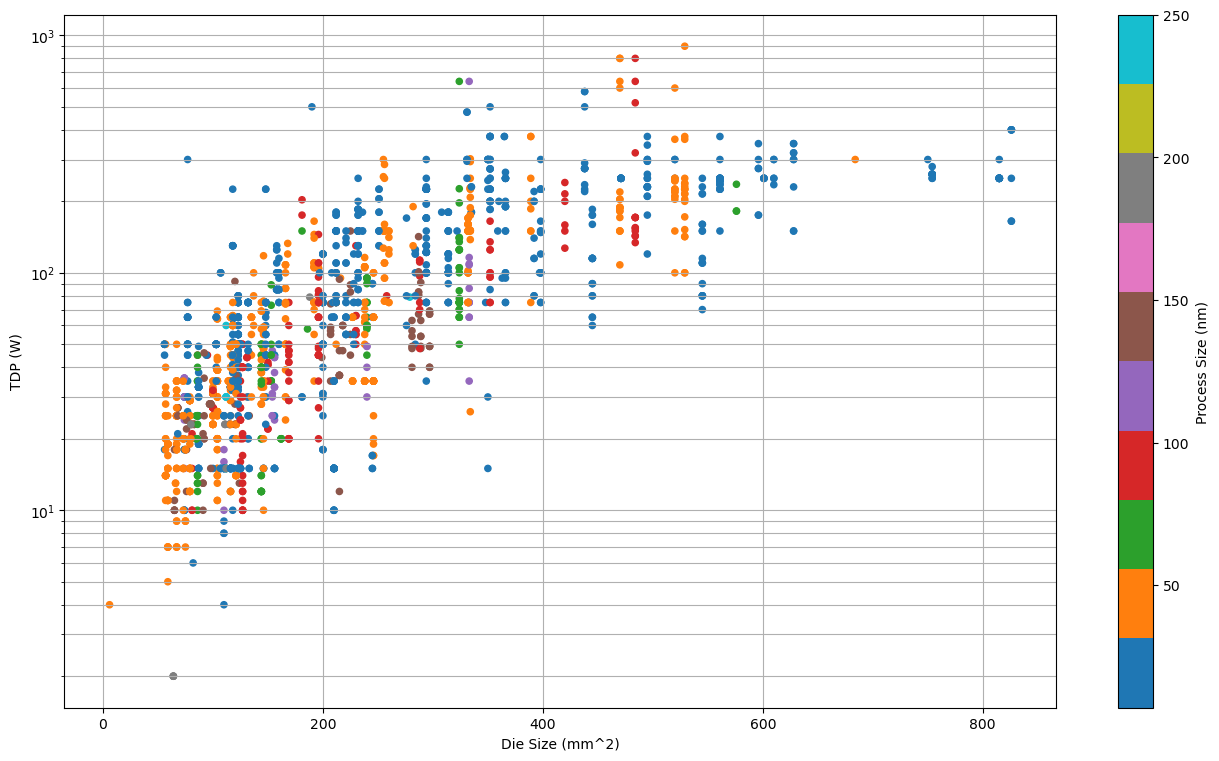

In [11]:
fig, ax = plt.subplots(figsize=(16,9))
gpus.plot.scatter('Die Size (mm^2)', y='TDP (W)', ax=ax, logy=True, c=gpus['Process Size (nm)'], cmap='tab10')
fig.get_axes()[1].set_ylabel('Process Size (nm)')
ax.grid(True, which="both")

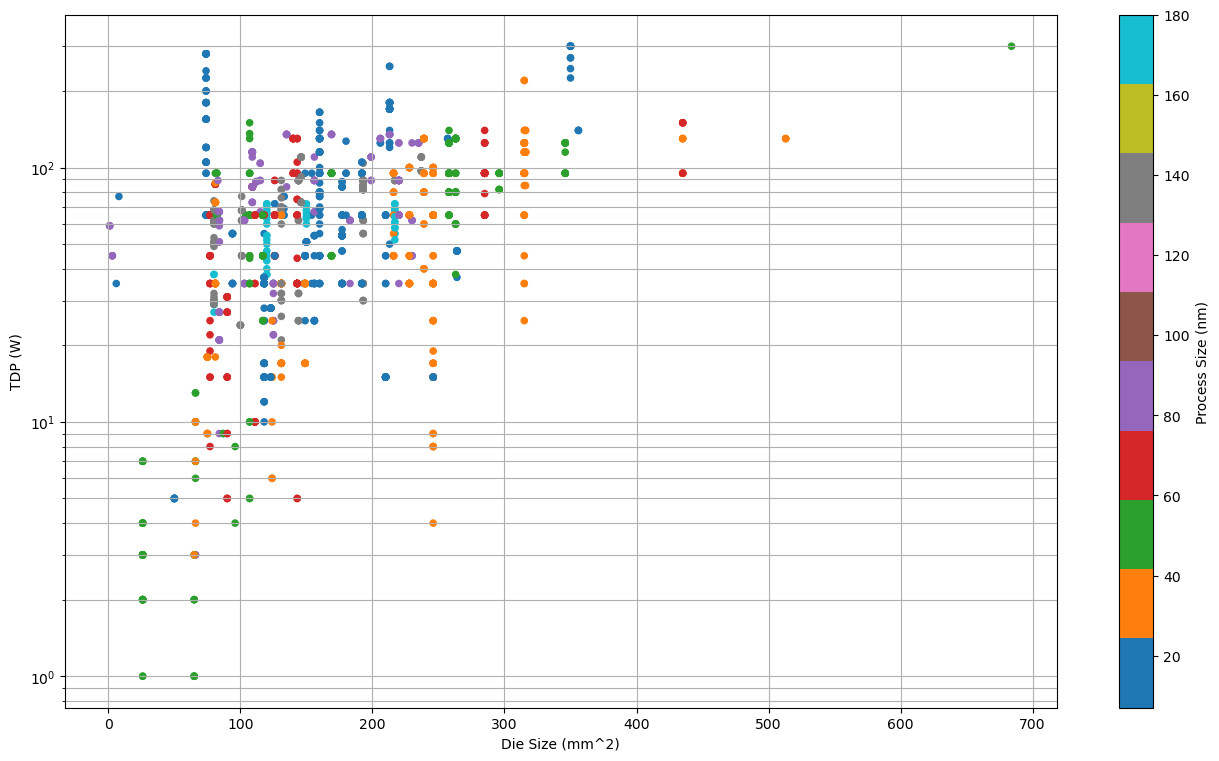

In [12]:
fig, ax = plt.subplots(figsize=(16,9))
cpus.plot.scatter('Die Size (mm^2)', y='TDP (W)', ax=ax, logy=True, c=cpus['Process Size (nm)'], cmap='tab10')
fig.get_axes()[1].set_ylabel('Process Size (nm)')
ax.grid(True, which="both")

From the graphs we can conclude that Dennard scaling is no longer valid. This is due to the increase in static power consumption as transistor sizes decrease.

### Power consumed over releases

In this section, we analyzed how the energy consumption of chips has changed over the years. To do this, we created a graph showing the consumption versus the release date of each chip.

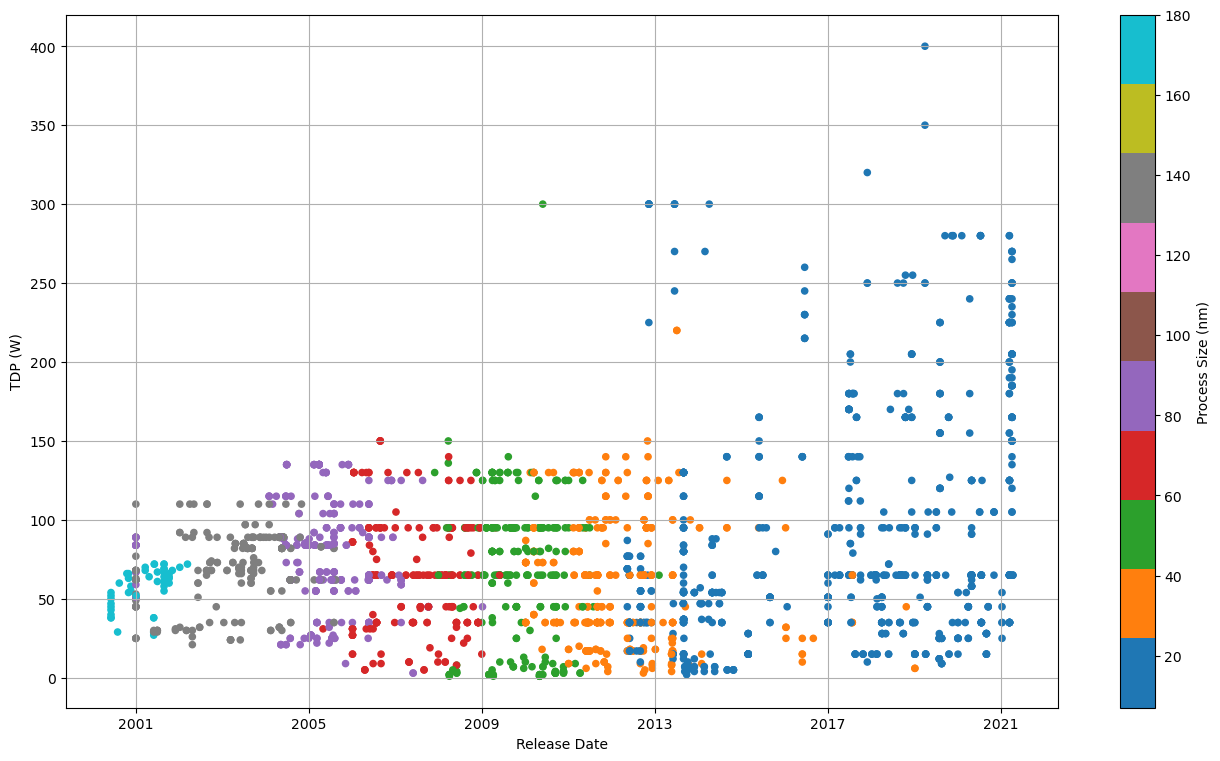

In [13]:
fig, ax = plt.subplots(figsize=(16,9))
cpus.plot.scatter('Release Date', y='TDP (W)', ax=ax, c=cpus['Process Size (nm)'], cmap='tab10')
fig.get_axes()[1].set_ylabel('Process Size (nm)')
ax.xaxis.set_major_locator(matlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matlib.dates.DateFormatter("%Y"))
plt.xticks(pd.date_range(cpus['Release Date'].min(), cpus['Release Date'].max(), freq='4YS'))
ax.grid(True, which="both")

In the case of CPUs, consumption had a consistent average until 2016 with the integration of production processes below 20 nanometers, which introduced additional challenges and problems in static transistor consumption.

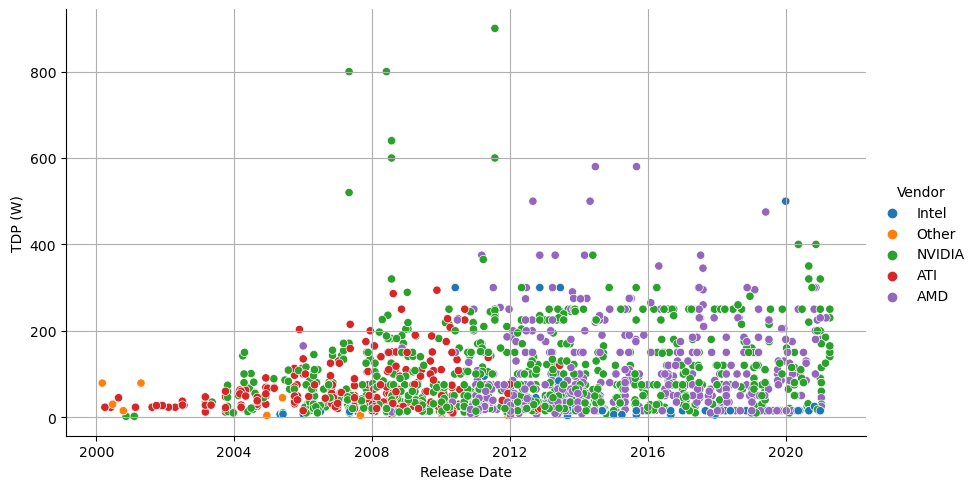

In [14]:
sns.relplot(data=gpus, x='Release Date', y='TDP (W)', hue='Vendor', aspect=16/9)
plt.grid(True)
plt.show()

In the case of GPUs, consumption instead grew until 2010 where it continued with a fixed average until today. In particular, if we look at Intel GPU consumption, it has remained almost constant, probably due to limits set by the company on products.

### CPUs have higher frequencies, but GPUs are catching up

We can check the frequencies of the various chips and compare them by graphing them over time.

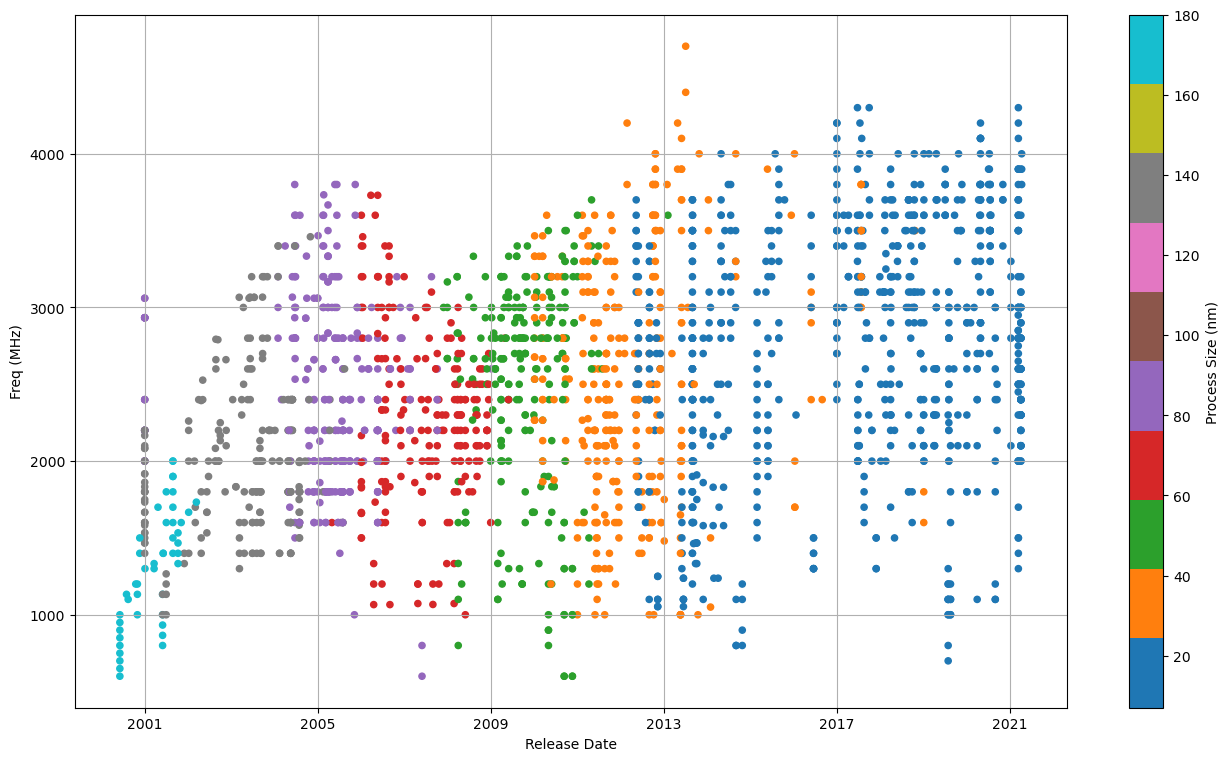

In [26]:
fig, ax = plt.subplots(figsize=(16,9))
cpus.plot.scatter('Release Date', y='Freq (MHz)', ax=ax, c=cpus['Process Size (nm)'], cmap='tab10')
fig.get_axes()[1].set_ylabel('Process Size (nm)')
ax.xaxis.set_major_locator(matlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matlib.dates.DateFormatter("%Y"))
plt.xticks(pd.date_range(cpus['Release Date'].min(), cpus['Release Date'].max(), freq='4YS'))
ax.grid(True, which="both")

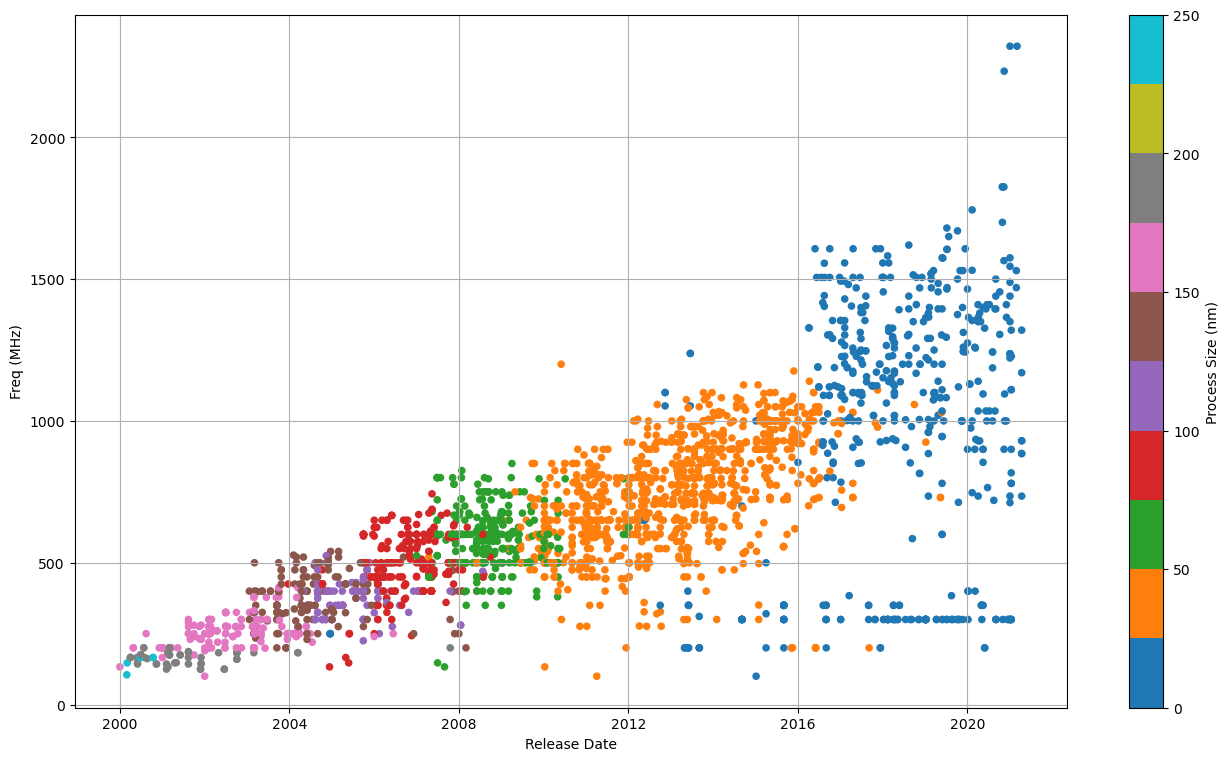

In [25]:
fig, ax = plt.subplots(figsize=(16,9))
gpus.plot.scatter('Release Date', y='Freq (MHz)', ax=ax, c=gpus['Process Size (nm)'], cmap='tab10')
fig.get_axes()[1].set_ylabel('Process Size (nm)')
ax.xaxis.set_major_locator(matlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matlib.dates.DateFormatter("%Y"))
plt.xticks(pd.date_range(gpus['Release Date'].min(), gpus['Release Date'].max(), freq='4YS'))
ax.grid(True, which="both")

In [96]:
chips.groupby('Type')['Freq (MHz)'].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
CPU,2192.0,2482.392792,755.199164,600.0,2000.0,2400.0,3000.0,4700.0
GPU,2662.0,662.622840,330.980631,100.0,412.0,600.0,850.0,2321.0


By using the describe() function and checking the graphs, it is evident that CPUs have higher frequencies than 2.4 GHz up to almost 5 GHz while GPUs have much lower frequencies with an average of 662 MHz but increasing. Especially in recent years, GPUs have increased their frequencies almost reaching those of CPUs

### Pollack's rule

Pollack’s Rule is a principle that describes the relationship between the complexity and the performance of a microprocessor. The complexity of a microprocessor refers to the amount of logic or circuitry that it contains, which is usually measured by its area or the number of transistors.

According to Pollack’s Rule, the performance of a microprocessor does not increase linearly with its complexity, but rather by the square root of its complexity. This means that if the complexity of a microprocessor is doubled, its performance will only increase by about 41%. This is because adding more logic or transistors to a microprocessor also introduces more challenges, such as longer wires, higher power consumption, more heat generation, and more design errors. These factors limit the speed and efficiency of a microprocessor.

Pollack’s Rule is named after Fred Pollack, who was a lead engineer and fellow at Intel, a leading company in the microprocessor industry. He observed this rule empirically based on the historical data of microprocessor development. He also predicted that the performance improvement of microprocessors due to microarchitecture advances, which are the design choices and optimizations of a microprocessor, would eventually slow down and reach a limit.

One way to verify Pollack’s Rule is to plot a graph of the number of transistors versus the performance of different microprocessors. The performance can be measured by various metrics, such as the number of operations per second, the clock frequency, or the instructions per cycle. One example of such a metric is the operations floating point 32 per second (FLOPS 32), which is the number of 32-bit floating-point operations that a microprocessor can perform in one second.

If Pollack’s Rule is true, the graph should show a curve that resembles a square root function, rather than a straight line. This means that the performance of microprocessors increases at a decreasing rate as the number of transistors increases.

Unfortunately, with this dataset, we can look the performance in FLOPS only for GPUS.

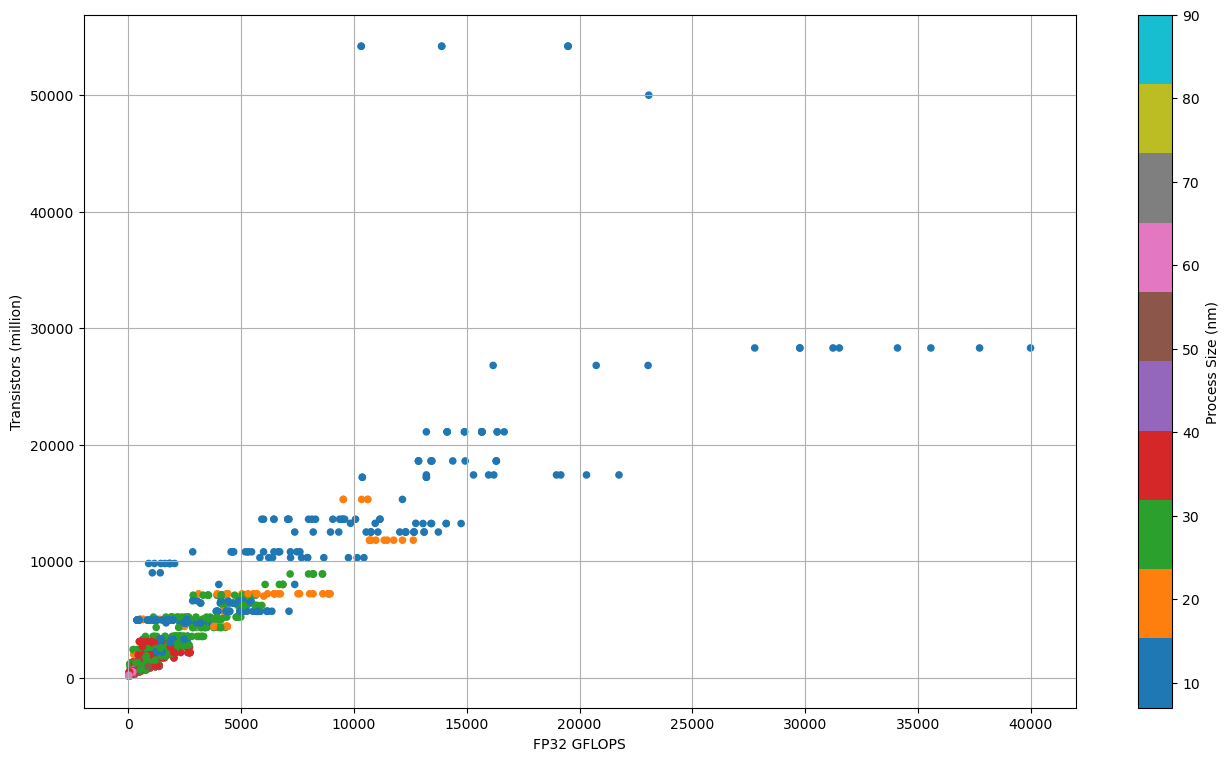

In [27]:
fig, ax = plt.subplots(figsize=(16,9))
gpus.plot.scatter('FP32 GFLOPS', y='Transistors (million)', ax=ax, c=gpus['Process Size (nm)'], cmap='tab10', logx=False)
fig.get_axes()[1].set_ylabel('Process Size (nm)')
ax.grid(True, which="both")

By looking at the graphs, one can see a trend that resembles the square root function, proving that Pollack’s rule is true.

### GPU performance improvements

We can analyze the improvement of the performance of GPUs and the link with the size of transistors, die size and operation frequencies by visualizing the corresponding graphs vs FLOPS 32 as a performance index.

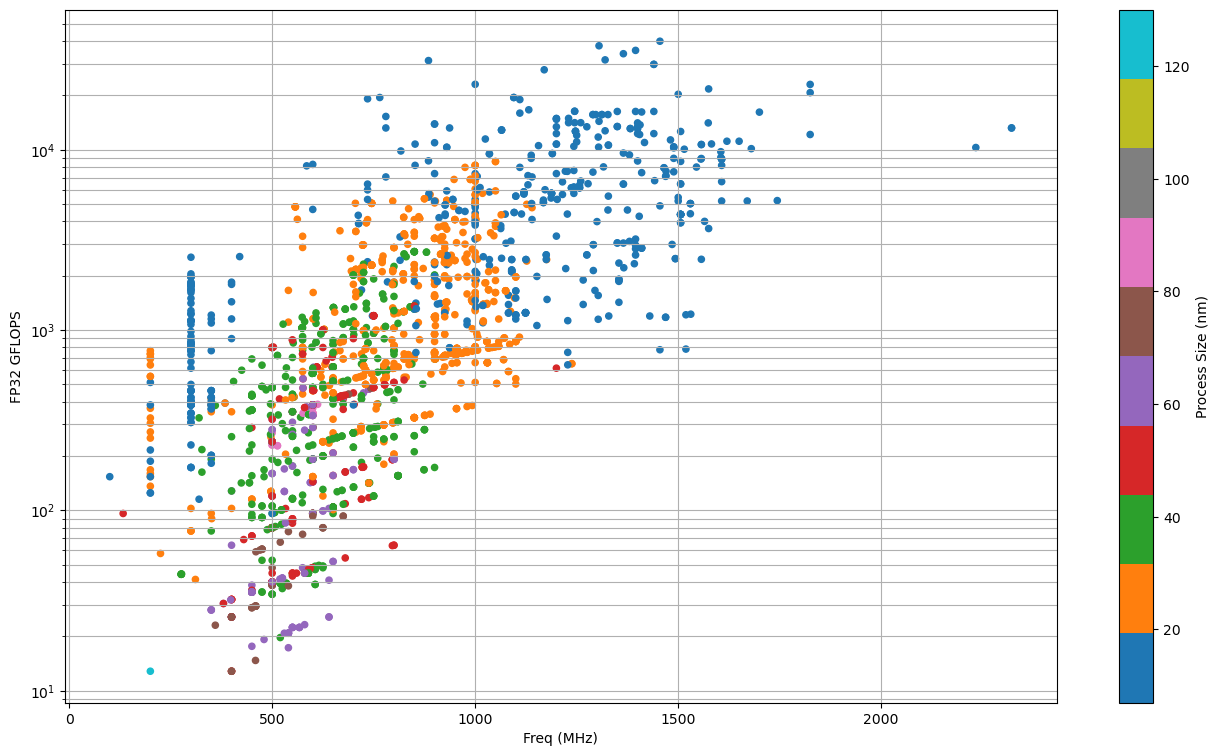

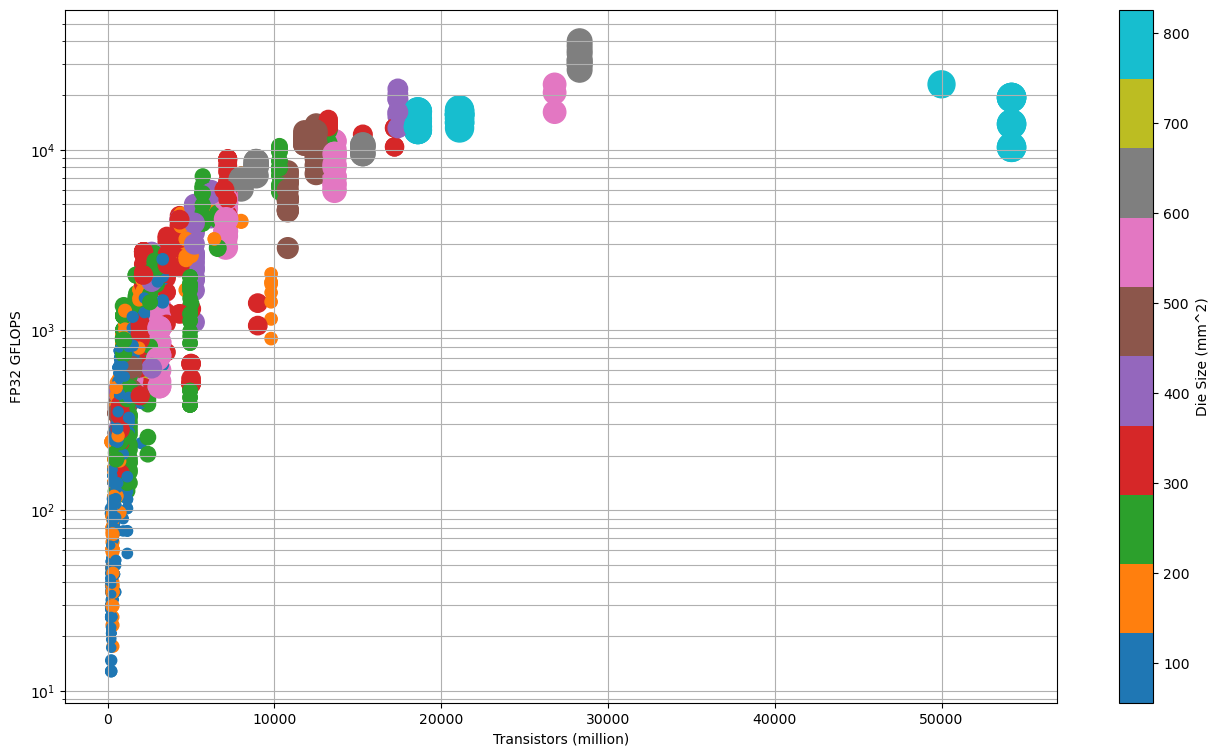

In [29]:
fig, ax = plt.subplots(figsize=(16,9))
gpus.plot.scatter('Freq (MHz)', y='FP32 GFLOPS', ax=ax, c=gpus['Process Size (nm)'], cmap='tab10', logy=True)
fig.get_axes()[1].set_ylabel('Process Size (nm)')
ax.grid(True, which="both")

fig, ax = plt.subplots(figsize=(16,9))
gpus.plot.scatter('Transistors (million)', y='FP32 GFLOPS', ax=ax, c=gpus['Die Size (mm^2)'], cmap='tab10', s=gpus['Die Size (mm^2)']/2,  logy=True)
fig.get_axes()[1].set_ylabel('Die Size (mm^2)')
ax.grid(True, which="both")

As can be seen from the graphs, the performance is closely related to the effects of transistor miniaturization, die size enlargement and operation frequency increase. 

In particular: the performance increases with the increase of the number of transistors, or the die size increases, or the operation frequencies increase or the transistor size decreases.

### GPU performance doubles every 1.5 years

Showing the performance of video cards in FLOPS 32 over the years, we can analyze the trend of how they grow.

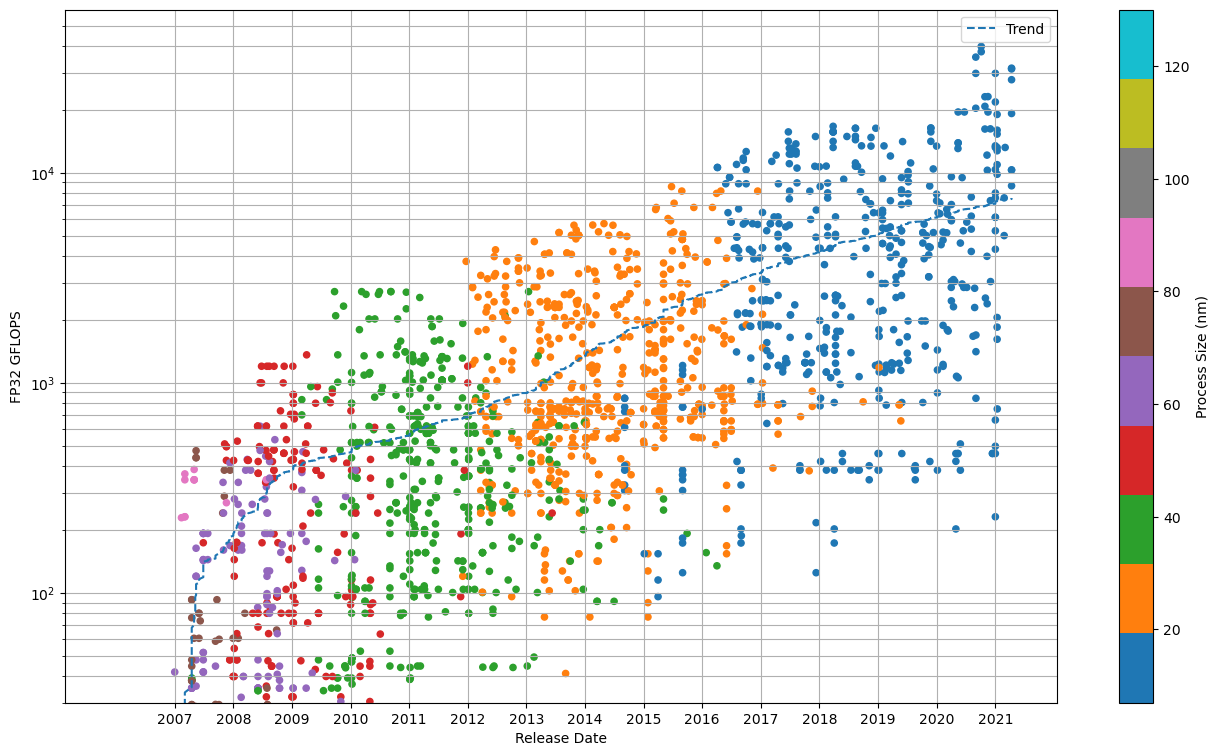

In [39]:
fig, ax = plt.subplots(figsize=(16,9))
gpusPerformance = gpus[gpus['Release Date'].dt.year > 2006]
gpusPerformance.plot.scatter('Release Date', y='FP32 GFLOPS', ax=ax, logy=True, c=gpusPerformance['Process Size (nm)'], cmap='tab10')
fig.get_axes()[1].set_ylabel('Process Size (nm)')
ax.xaxis.set_major_locator(matlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matlib.dates.DateFormatter("%Y"))
plt.xticks(pd.date_range(gpusPerformance['Release Date'].min(), gpusPerformance['Release Date'].max(), freq='1YS'))
ax.grid(True, which="both")

df = gpus
df = df.dropna(subset=['FP32 GFLOPS'])
df = df.sort_values(by='Release Date')
ax.grid(True, which="both")
fp = df['FP32 GFLOPS']

# dates are linear so just use len of usage array and save dates as tick labels
ax.plot(df['Release Date'], np.poly1d(np.polyfit(range(len(fp)), fp, 3))(range(len(fp))), '--', label='Trend')
ax.grid(True, which="both")
ax.set_ylim(bottom=30)
plt.legend()

From the graphs, helping us with a polynomial fit of sufficiently high degree, we notice that the performance doubles at different intervals for each technological leap of production process. In detail, we notice that for processes above 20 nm, the performance doubles every 2 years, under 20 nm instead it doubles every 3 years. The increase in performance is decreasing over time. This phenomenon is due to the physical and technological limits that make it increasingly difficult to miniaturize transistors and increase their efficiency.

### Energy vs performance

It is also interesting to analyze the trend of energy consumption with the performance of video cards.

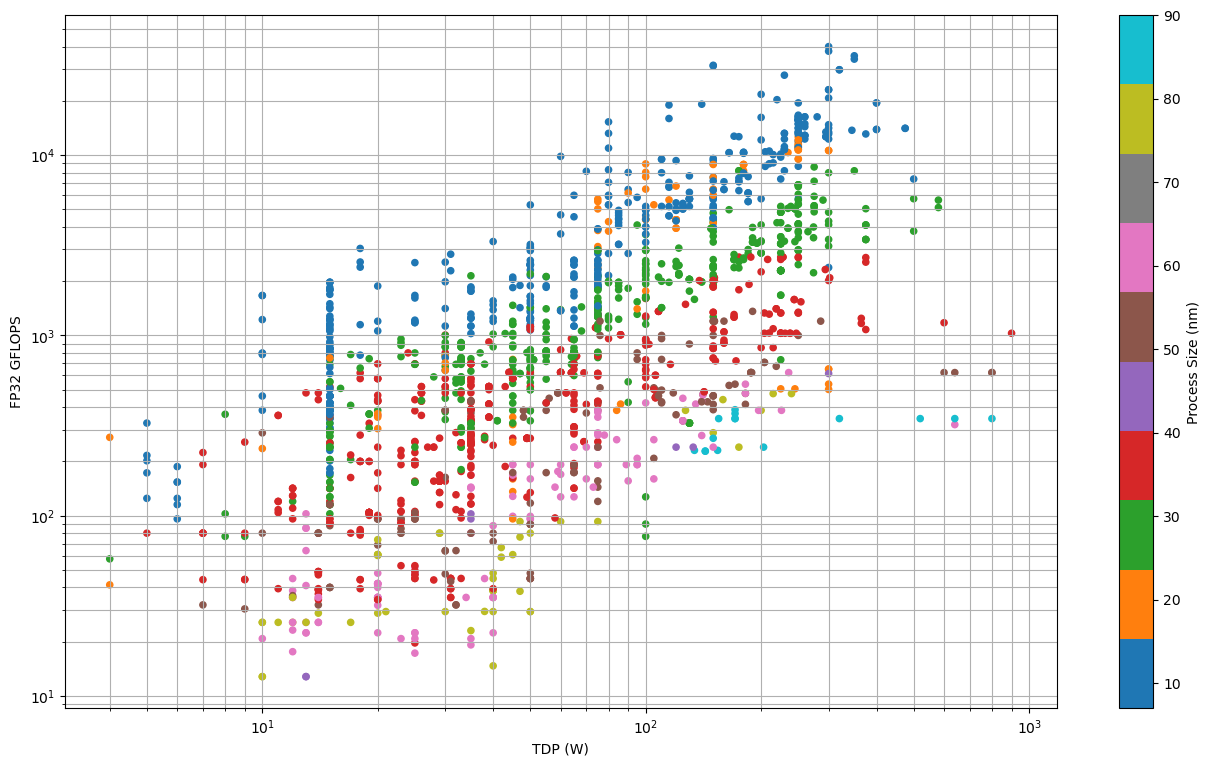

In [41]:
fig, ax = plt.subplots(figsize=(16,9))
gpus.plot.scatter('TDP (W)', y='FP32 GFLOPS', ax=ax, c=gpus['Process Size (nm)'], cmap='tab10', logx=True, logy=True)
fig.get_axes()[1].set_ylabel('Process Size (nm)')
ax.grid(True, which="both")

By graphing the data of performance and consumption of GPUs, we can notice a mostly uniform trend of increasing energy consumption with increasing performance regardless of the production process used. This means that more powerful video cards require more energy to operate, but not necessarily are more efficient from an energy point of view. The energy consumption of video cards depends on many factors, including clock frequency, number of cores, architecture, type of memory and production process.

### Vendors and foundry

Finally, the dataset also indicates the production foundries of most of the chips. These foundries are the companies that deal with physically producing the chips from the designs provided by the customers. The foundries are characterized by a high cost of investment and a strong competition at the global level. The most advanced foundries are able to produce chips with increasingly smaller production processes, which allow to increase the density, speed and efficiency of the circuits.

In [100]:
chips['Foundry'].unique()

array(['Unknown', 'Intel', 'GF', 'TSMC', 'UMC', 'Samsung', 'Renesas',
       'Sony', 'NEC', 'IBM'], dtype=object)

It can be seen that the major chip manufacturers are: Intel, TSMC and General foundries.

Text(0.5, 1.0, 'Production of chips by foundries')

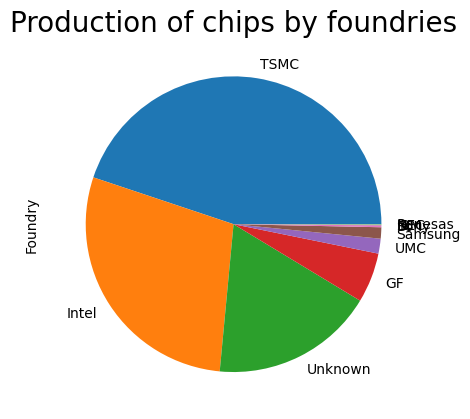

In [54]:
chips['Foundry'].value_counts().plot.pie()
plt.title('Production of chips by foundries', fontsize = 20)

Text(0.5, 1.0, 'Foundries for AMD')

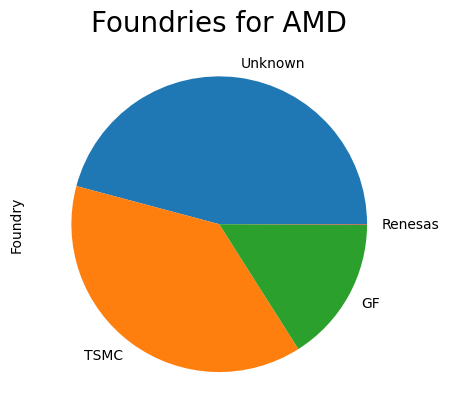

In [53]:
chips[chips['Product'].str.contains("AMD")]['Foundry'].value_counts().plot.pie()
plt.title('Foundries for AMD', fontsize = 20)

Text(0.5, 1.0, 'Foundries for NVIDIA')

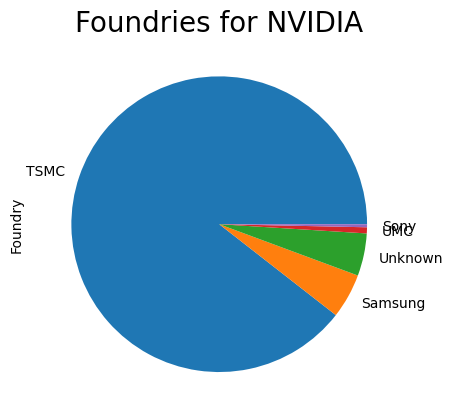

In [52]:
chips[chips['Product'].str.contains("NVIDIA")]['Foundry'].value_counts().plot.pie()
plt.title('Foundries for NVIDIA', fontsize = 20)

Text(0.5, 1.0, 'Foundries for Intel')

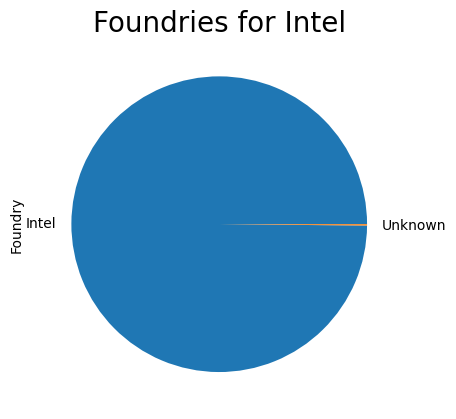

In [51]:
chips[chips['Product'].str.contains("Intel")]['Foundry'].value_counts().plot.pie()
plt.title('Foundries for Intel', fontsize = 20)

In conclusion, it can be seen that AMD mostly uses TSMC and general foundries, INTEL uses only its own, while NVIDIA uses those of TSMC and samung.